# Install and import neccesary packages

In [10]:
! pip install transformers

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [6]:
import os, numpy as np, pandas as pd
from transformers import pipeline
from PIL import Image

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [7]:
def plot_image_grid(images, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img, cmap=cmap)

# Connect to the Data Set

In [8]:
data_dir = "all_images"

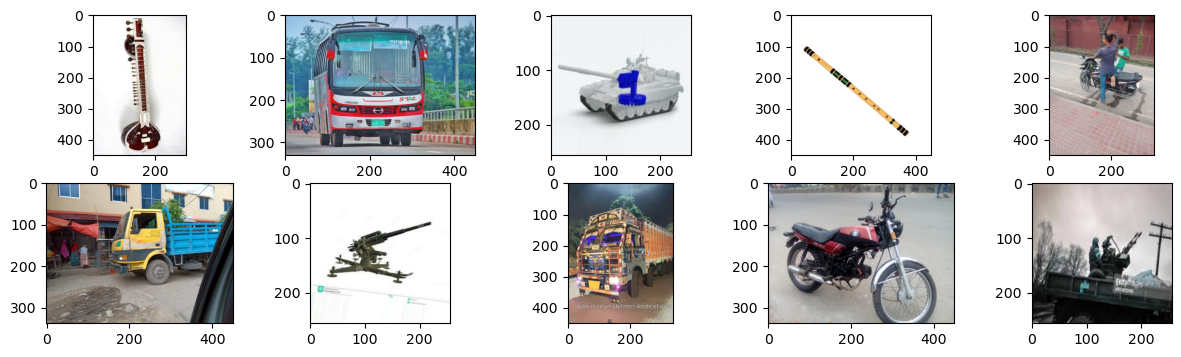

In [21]:
img_examples = [os.path.join(data_dir,i) for i in np.random.choice(os.listdir(data_dir), size=10)]

plot_image_grid([mpimg.imread(i) for i in img_examples])

# Zero-shot Image Labeling

In [14]:
checkpoint = "openai/clip-vit-large-patch14"
classifier = pipeline(model=checkpoint, task="zero-shot-image-classification")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [60]:
img_files = [os.path.join(data_dir,i) for i in np.random.choice(os.listdir(data_dir), size=100)]

candidate_labels = ["military vehicle", "car", "truck"]

threshold= 0.9

In [61]:
results = classifier(img_files, candidate_labels=candidate_labels)

In [81]:
mil_vehicle_results = np.array([[i['score'] for i in res if i['label'] == "military vehicle"] for res in results]).flatten()
mil_vehicle_results_files = [imgs[i] for i in np.where(mil_vehicle_results > threshold)[0]-1]

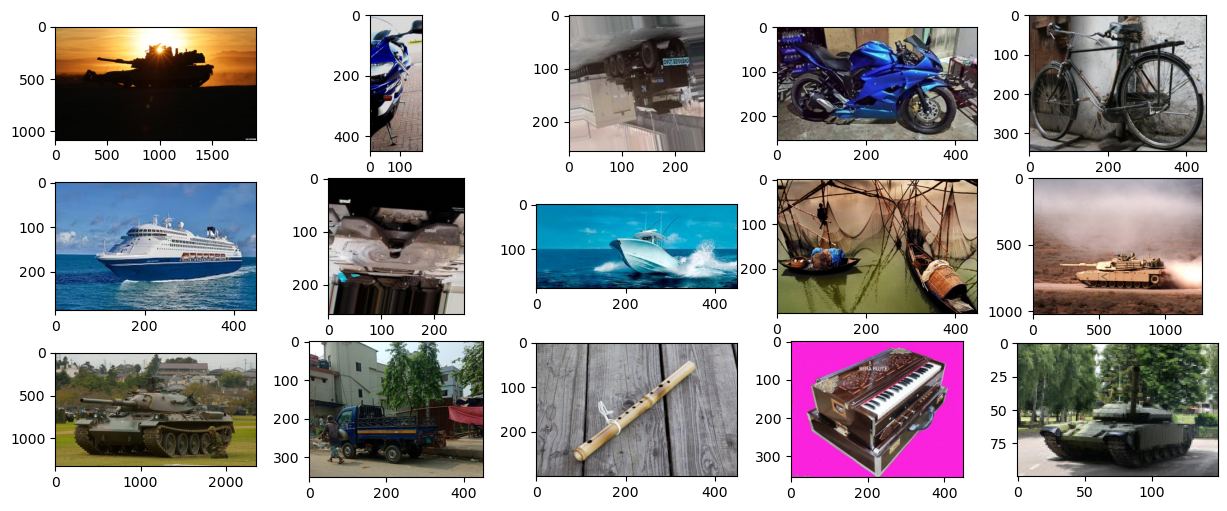

In [82]:
plot_image_grid([mpimg.imread(i) for i in mil_vehicle_results_files])

In [84]:
[i for i in os.listdir(data_dir) if i in 

['image3134.jpg',
 'war_tank (490).jpg',
 'image1313.jpg',
 'Armored personnel carriers_0_8491.jpeg',
 'image6865.jpg',
 'image434.jpg',
 'war_tank (230).jpg',
 'Anti-aircraft_0_5265.jpeg',
 'image3319.jpg',
 'image4989.jpg',
 'image3855.jpg',
 'image6957.jpg',
 'image6250.jpg',
 'image5872.jpg',
 'image5459.jpg',
 'image4417.jpg',
 'image4174.jpg',
 'Datacluster Truck (115).jpg',
 'image790.jpg',
 'image4262.jpg',
 'Prime movers and trucks_0_3718.jpeg',
 'image3634.jpg',
 'Prime movers and trucks_0_8423.jpeg',
 'image1418.jpg',
 'image5036.jpg',
 'image3698.jpg',
 'image5103.jpg',
 'image6082.jpg',
 'Self-propelled artillery_0_4697.jpeg',
 'Armored personnel carriers_0_9509.jpeg',
 'image1143.jpg',
 'image4645.jpg',
 'war_tank (407).jpg',
 'image6657.jpg',
 'image2828.jpg',
 'Self-propelled artillery_0_4816.jpeg',
 'Anti-aircraft_0_6766.jpeg',
 'image3495.jpg',
 'image3557.jpg',
 'image3384.jpg',
 'image2731.jpg',
 'image940.jpg',
 'image2636.jpg',
 'image4436.jpg',
 'war_tank (617).j

# Prompt Engineering for Better Performance

# Fine Tuning the Model

# Saving and Loading Models